In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
%matplotlib inline

In [2]:
calendar = pd.read_csv('calendar.csv')

In [3]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
# total observations of Calendar
print(len(calendar))
# total oberservations with price
print(sum(calendar.price.isnull()))

1308890
665853


In [5]:
# fill the Nan value in price column with 0
calendar['price'] = calendar['price'].fillna('0')

# The price value is stored in string like '$1,175.00', we have to turn it into float to compute the price.
# First we use re to remove the '$' and ',' in the value
calendar['price'] = calendar['price'].apply(lambda val: re.sub(r'[$,]', '', val))

# Then we will get the value like '1175.00', therefore we can turn it into float
calendar['price'] = calendar['price'].apply(lambda val: float(val))

# There are some extremly high values (eg., 1175.00), we take those values as a outliers. We set a threshold as 300 to filter
# the outliers (you can determine the threshold by yourself, its just a personal perspective to explore the data.)
calendar['price'] = calendar['price'].apply(lambda val: 0 if val > 300 else val)

# group the price by the date column.month, and remove the rows with 0 price.
df_price = pd.DataFrame(calendar.groupby(pd.to_datetime(calendar['date']).dt.strftime('%m'))['price'].sum())
calendar = calendar[calendar.price != 0]

# Turn the calendat.available value 'f' and 't' to int, and group it by the month.
calendar['available'] = calendar['available'].apply(lambda col: 1 if col == 't' else 0)
df_avail = pd.DataFrame(calendar.groupby(pd.to_datetime(calendar['date']).dt.strftime('%m'))['available'].sum())

# Get the mean price of each month
df_AandP = df_price['price']/df_avail['available']

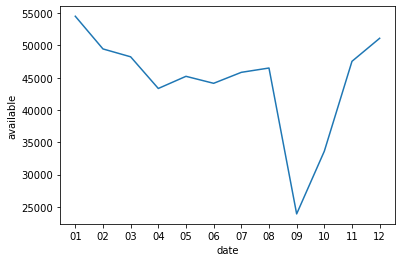

In [6]:
# Plot the total available listings of each month.
sns.lineplot(x=df_avail.index, y=df_avail['available'])

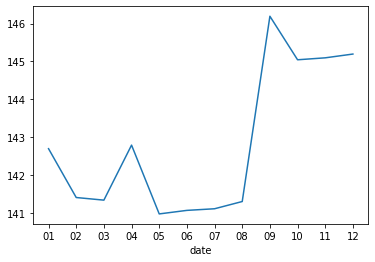

In [7]:
# Plot the listings average price of each month. 
sns.lineplot(x=df_price.index, y=df_AandP)

In [8]:
# Compare the price and the availability with Pearson correlation coefficients. As shown in the result, the
# coef is -0.5,  which means when the availability(supply) decrease, the price(demand) increase.
np.corrcoef(df_AandP.values, df_avail['available'].values)

array([[ 1.        , -0.50791454],
       [-0.50791454,  1.        ]])